In [9]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [12]:
len(X_train_full)

15480

In [13]:
len(X_test)

5160

In [14]:
len(X_valid)

3870

In [15]:
len(X_train)

11610

In [16]:
# Convert x_train dataset into a DataFrame with attribute names
df_train = pd.DataFrame(X_train_full, columns=housing.feature_names)

# Print the DataFrame 
print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.2143      37.0  5.288235   0.973529       860.0  2.529412     33.81   
1  5.3468      42.0  6.364322   1.087940       957.0  2.404523     37.16   
2  3.9191      36.0  6.110063   1.059748       711.0  2.235849     38.45   
3  6.3703      32.0  6.000000   0.990196      1159.0  2.272549     34.16   
4  2.3684      17.0  4.795858   1.035503       706.0  2.088757     38.57   

   Longitude  
0    -118.12  
1    -121.98  
2    -122.69  
3    -118.41  
4    -121.33  


# Standardize the Data

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
len(X_valid)

3870

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

# Let us now define the model architecture

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"), 
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 3.4730 - val_loss: 1.2921
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 1.0879 - val_loss: 0.8258
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.8850 - val_loss: 0.7219
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.7979 - val_loss: 0.6590
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.7377 - val_loss: 0.6120
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.6896 - val_loss: 0.5740
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.6487 - val_loss: 0.5428
Epoch 8/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.6141 - val_loss: 0.5174
Epoch 9/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.5857 - val_loss: 0.4972
Epoch 10/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.5620 - val_loss: 0.4813
Epoch 11/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.5418 - val_loss: 0.4690
Epoch 12/40
363/363 ━━━━━━━━━━

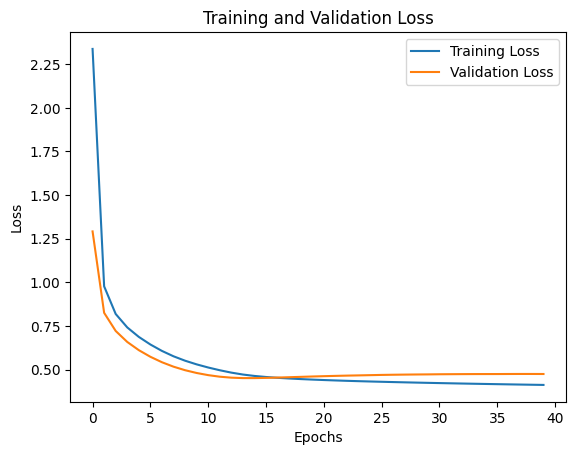

In [27]:
# Plot the Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.show()